# Multi-channel Data

## Visualizing the dataset

The goal of this jupyter notebook is to illustrate how to load the train and validation sets for the MR reconstruction challenge. Note that k-space is centered and image are saved slice-wise. Also, the multi-channel data was partially Fourier acquired.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import os
import glob
import sys

# Add our module to the path
sys.path.append("../Modules/")
from utils import sum_of_squares
import natsort

In [2]:
# Train Set 
kspace_files_train = np.asarray(glob.glob("/media/roberto/Seagate8TB/Slices/12-channel/Train/e14396s3_P52224*.npy"))
kspace_files_train = natsort.natsorted(kspace_files_train)

# Validation set
kspace_files_val = np.asarray(glob.glob("/media/roberto/Seagate8TB/Slices/12-channel/Val/*.npy"))
kspace_files_val = natsort.natsorted(kspace_files_val)

print(kspace_files_train[0])
print(len(kspace_files_train))
print 
print(kspace_files_val[0])
print(len(kspace_files_val))

/media/roberto/Seagate8TB/Slices/12-channel/Train/e14396s3_P52224_1.npy
256
/media/roberto/Seagate8TB/Slices/12-channel/Val/e14110s3_P59904_1.npy
4608


## Sample Train k-space and image reconstruction

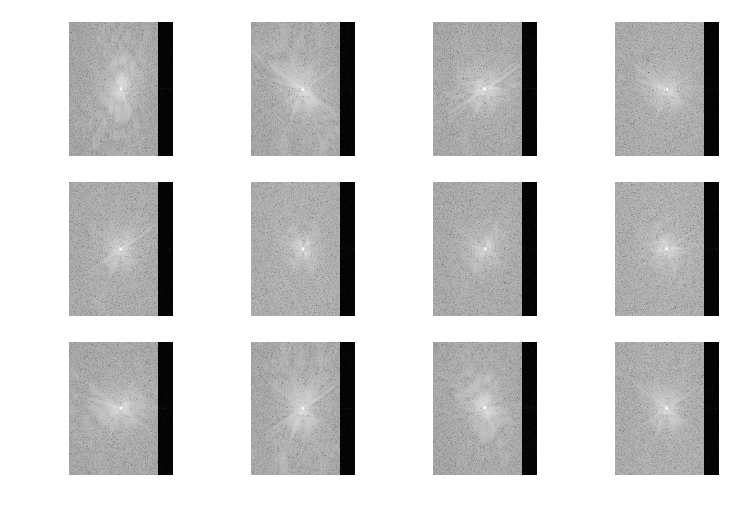

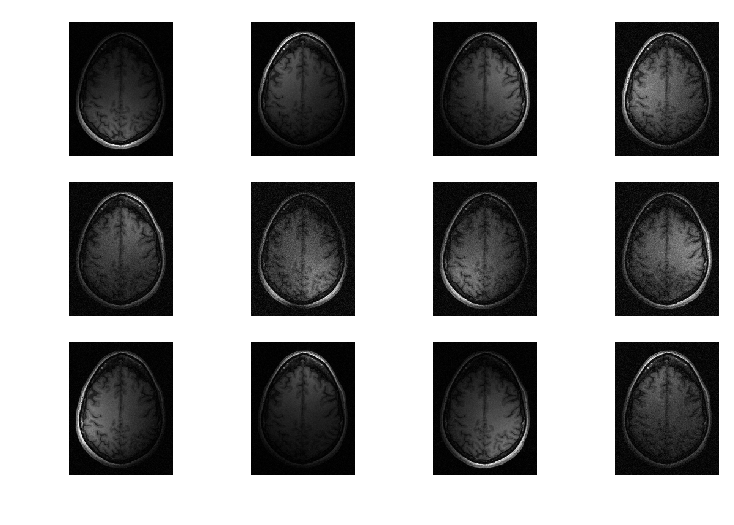

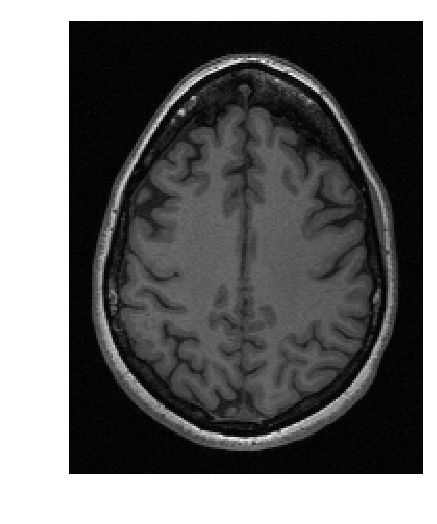

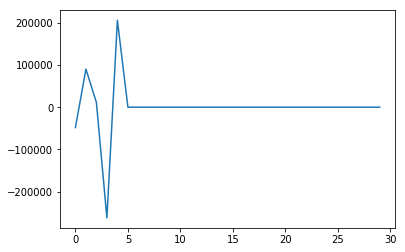

In [4]:
sample_kspace_train = np.load(kspace_files_train[100])

# Converting to complex
sample_kspace_train = sample_kspace_train[:,:,::2] + 1j*sample_kspace_train[:,:,1::2]

# Displaying channels' k-spaces
plt.figure(dpi = 150)
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.imshow(np.log(1+np.abs(sample_kspace_train[:,:,ii])),cmap = "gray")
    plt.axis("off")
plt.show()

sample_rec_train = np.fft.ifft2(sample_kspace_train,axes = (0,1))
# Displaying channels' images
plt.figure(dpi = 150)
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.imshow(np.abs(sample_rec_train[:,:,ii]),cmap = "gray")
    plt.axis("off")
plt.show()

plt.figure(dpi = 150)
plt.imshow(sum_of_squares(sample_rec_train),cmap = "gray")
plt.axis("off")
plt.show()

plt.figure()
plt.plot(sample_kspace_train[0,:,0].real[140:])
plt.show()

## Sample Validation k-space and image reconstruction

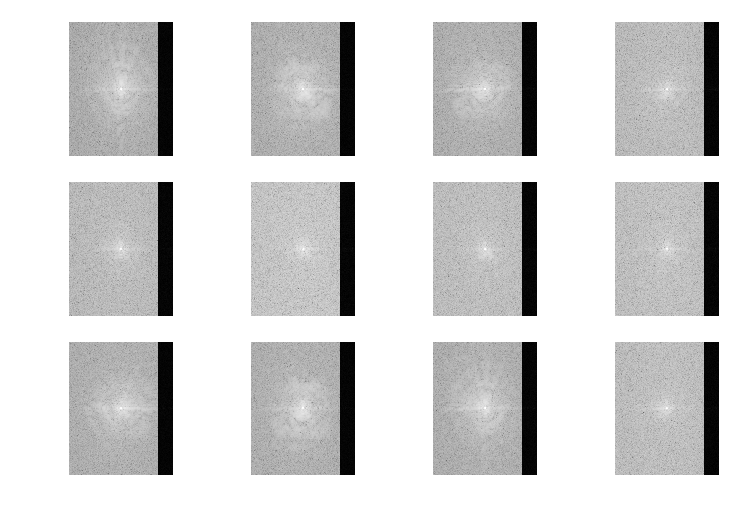

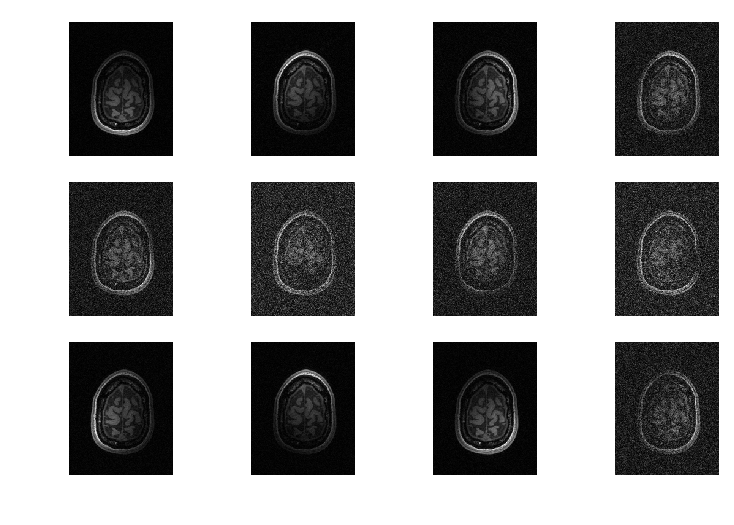

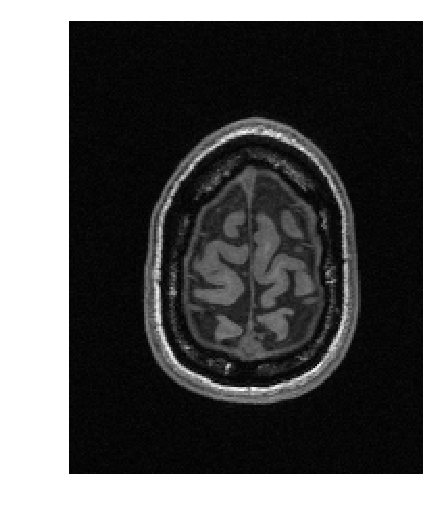

In [4]:
sample_kspace_val = np.load(kspace_files_val[195])

# Converting to complex
sample_kspace_val = sample_kspace_val[:,:,::2] + 1j*sample_kspace_val[:,:,1::2]

# Displaying channels' k-spaces
plt.figure(dpi = 150)
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.imshow(np.log(1+np.abs(sample_kspace_val[:,:,ii])),cmap = "gray")
    plt.axis("off")
plt.show()

sample_rec_val = np.fft.ifft2(sample_kspace_val,axes = (0,1))
# Displaying channels' images
plt.figure(dpi = 150)
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.imshow(np.abs(sample_rec_val[:,:,ii]),cmap = "gray")
    plt.axis("off")
plt.show()

plt.figure(dpi = 150)
plt.imshow(sum_of_squares(sample_rec_val),cmap = "gray")
plt.axis("off")
plt.show()

## Displaying the whole volume ordered

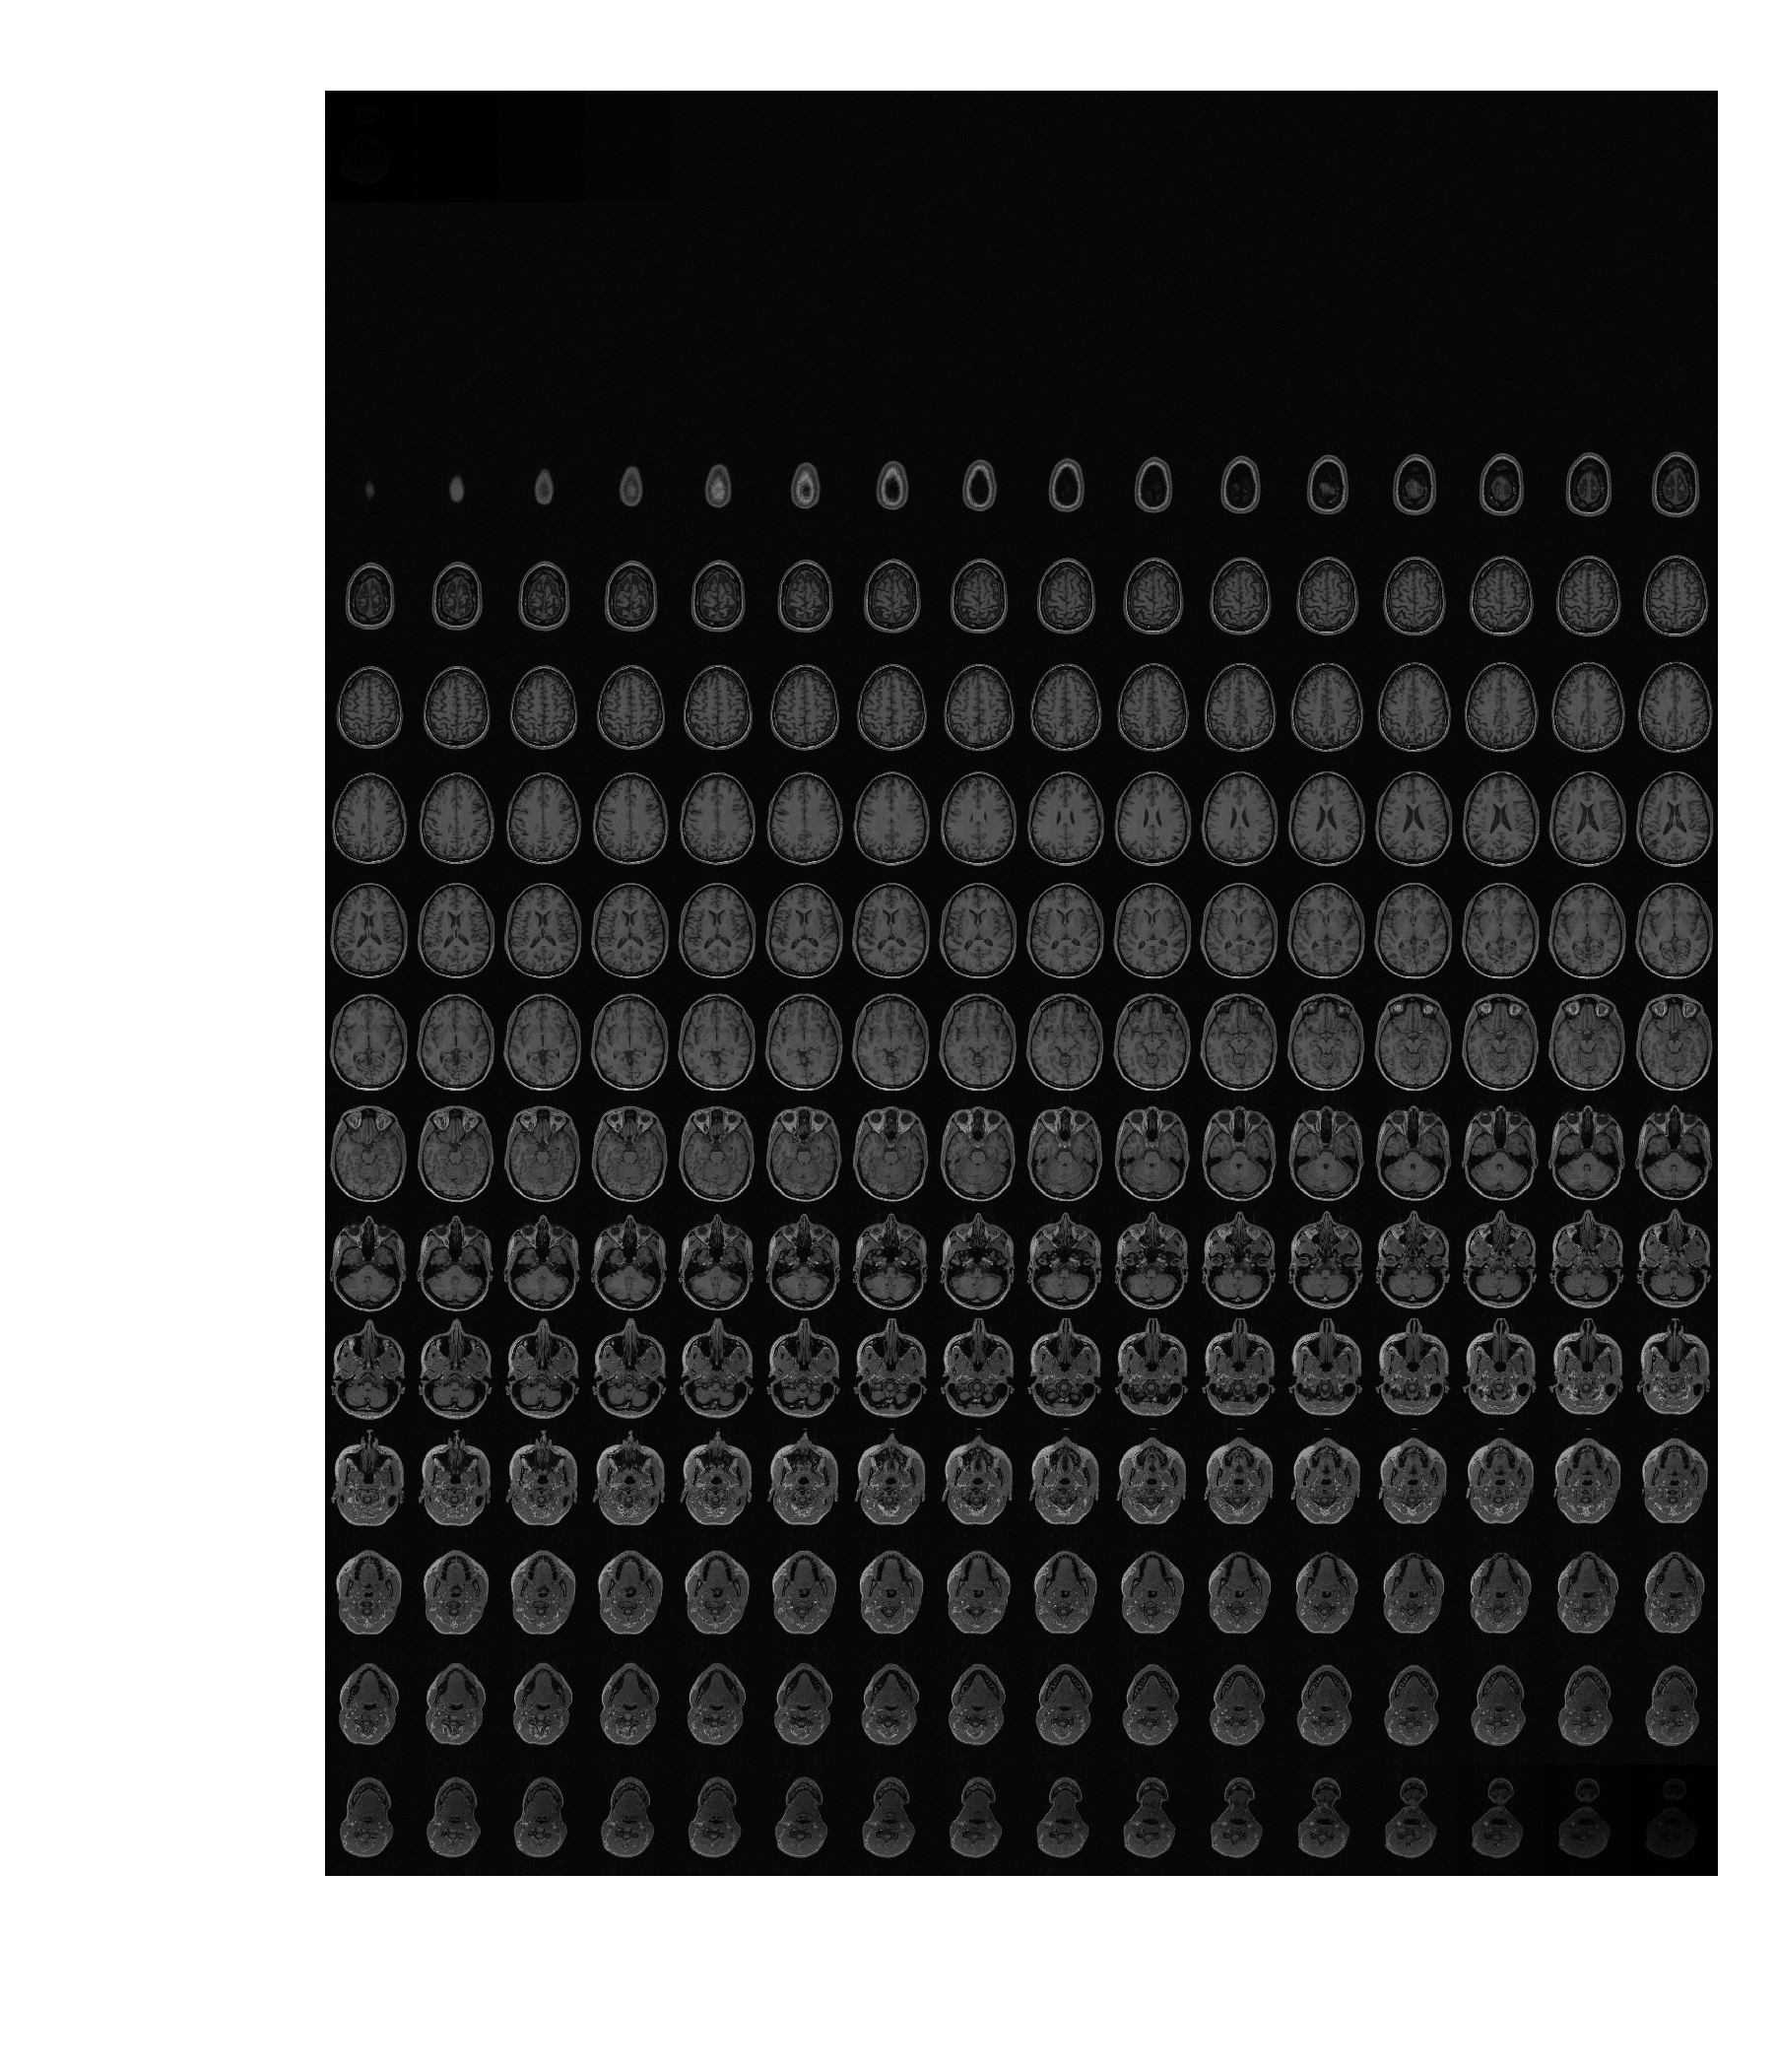

In [5]:
sample_kspace_vol = kspace_files_val[:256]
sample_kspace_vol = np.fft.fftshift(sample_kspace_vol)
vol = np.zeros((218*16,170*16))
for i,sample_kspace in enumerate(sample_kspace_vol):
    sample_kspace = np.load(sample_kspace)

    # Converting to complex
    sample_kspace = sample_kspace[:,:,::2] + 1j*sample_kspace[:,:,1::2]
    sample_rec = np.fft.ifft2(sample_kspace,axes = (0,1))
    vol[i//16*218:(i//16+1)*218,i%16*170:(i%16+1)*170] = sum_of_squares(sample_rec)
    
plt.figure(dpi = 600)
plt.imshow(vol,cmap = "gray")
plt.axis("off")
plt.show()